In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel, pipeline

In [ ]:
#2 Define the model
model_name="AptaArkana/hoaxpemilu"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/738k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

In [ ]:
#3 Create pipeline
my_pipeline  = pipeline("text-classification", model=model_name, tokenizer=tokenizer)

In [ ]:
#4 Prediction hoax
text_hoax = ['Gibran bicara tidak jelas',
             'Jokowi pimpin deklarasi Ganjar Pranowo',
             'Luhut Binsar Deklarasikan Dukung Anies Baswedan',
             'Video Ribuan Relawan Ganjar dan Prabowo Balik Arah Dukung Anies Baswedan',
             'Cuitan Taylor Swift di X Berterima kasih kepada Prabowo Subianto',
             'Video Sidang Istri Anies Baswedan yang Tersandung Kasus Uang PAUD 6,4 Triliun',
             'Kesuksesan Food Estate Prabowo di Jawa Tengah',
             'Prabowo dan Jokowi Kunjungan ke Solo, Warga Solo Teriak Anies Presiden']

for t in text_hoax:
  print(my_pipeline(t))

[{'label': 'Fakta', 'score': 0.9995571970939636}]
[{'label': 'Hoax', 'score': 0.9992163181304932}]
[{'label': 'Hoax', 'score': 0.9998356103897095}]
[{'label': 'Hoax', 'score': 0.9999780654907227}]
[{'label': 'Hoax', 'score': 0.9999786615371704}]
[{'label': 'Hoax', 'score': 0.9999788999557495}]
[{'label': 'Fakta', 'score': 0.9999507665634155}]
[{'label': 'Hoax', 'score': 0.9917131662368774}]


In [13]:
import pandas as pd

# Data untuk artikel fakta
data_fakta = {'judul_artikel': [
    'Ini Nama-nama 12 Panelis Debat Terakhir Pilpres 2024',
    'PKB soal Masinton Cuit GanjarMahfud2024-AMINAjaDulu: 01 dan 03 Mesti Bersatu',
    'Edy Pamer Foto Jenderal Dukung AMIN, Gerindra: Prabowo-Gibran Didukung Rakyat',
    'Jokowi Pastikan Pertemuannya dengan Mahfud: Nanti Sore',
    'Almas Gugat Gibran Wanprestasi Buntut Putusan MK soal Usia Capres-Cawapres',
    'Respons Jokowi soal Mahfud Akan Mundur dari Menko Polhukam',
    'Jokowi: Nanti Sore Mungkin Ketemu Pak Mahfud',
    'Tiba di Manado, Ganjar Dialog dengan Tokoh Agama Sinode GMIM'
],
    'label': ['Fakta'] * 8
}

# Data untuk artikel hoax
data_hoax = {'judul_artikel': [
    'Gibran bicara tidak jelas',
    'Jokowi pimpin deklarasi Ganjar Pranowo',
    'Luhut Binsar Deklarasikan Dukung Anies Baswedan',
    'Video Ribuan Relawan Ganjar dan Prabowo Balik Arah Dukung Anies Baswedan',
    'Cuitan Taylor Swift di X Berterima kasih kepada Prabowo Subianto',
    'Video Sidang Istri Anies Baswedan yang Tersandung Kasus Uang PAUD 6,4 Triliun',
    'Kesuksesan Food Estate Prabowo di Jawa Tengah',
    'Prabowo dan Jokowi Kunjungan ke Solo, Warga Solo Teriak Anies Presiden'
],
    'label': ['Hoax'] * 8
}

# Membuat dataframe untuk artikel fakta
df_fakta = pd.DataFrame(data_fakta)

# Membuat dataframe untuk artikel hoax
df_hoax = pd.DataFrame(data_hoax)

# Menggabungkan kedua dataframe
df = pd.concat([df_fakta, df_hoax], ignore_index=True)

# Menampilkan dataframe
print(df)

                                        judul_artikel  label
0   Ini Nama-nama 12 Panelis Debat Terakhir Pilpre...  Fakta
1   PKB soal Masinton Cuit GanjarMahfud2024-AMINAj...  Fakta
2   Edy Pamer Foto Jenderal Dukung AMIN, Gerindra:...  Fakta
3   Jokowi Pastikan Pertemuannya dengan Mahfud: Na...  Fakta
4   Almas Gugat Gibran Wanprestasi Buntut Putusan ...  Fakta
5   Respons Jokowi soal Mahfud Akan Mundur dari Me...  Fakta
6        Jokowi: Nanti Sore Mungkin Ketemu Pak Mahfud  Fakta
7   Tiba di Manado, Ganjar Dialog dengan Tokoh Aga...  Fakta
8                           Gibran bicara tidak jelas   Hoax
9              Jokowi pimpin deklarasi Ganjar Pranowo   Hoax
10    Luhut Binsar Deklarasikan Dukung Anies Baswedan   Hoax
11  Video Ribuan Relawan Ganjar dan Prabowo Balik ...   Hoax
12  Cuitan Taylor Swift di X Berterima kasih kepad...   Hoax
13  Video Sidang Istri Anies Baswedan yang Tersand...   Hoax
14      Kesuksesan Food Estate Prabowo di Jawa Tengah   Hoax
15  Prabowo dan Jokowi K

In [14]:
x_test = df['judul_artikel']
y_test = df['label']

In [15]:
predictions = my_pipeline(x_test.tolist())
y_pred = [pred['label'] for pred in predictions]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Fakta', 'Hoax'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8 0]
 [2 6]]


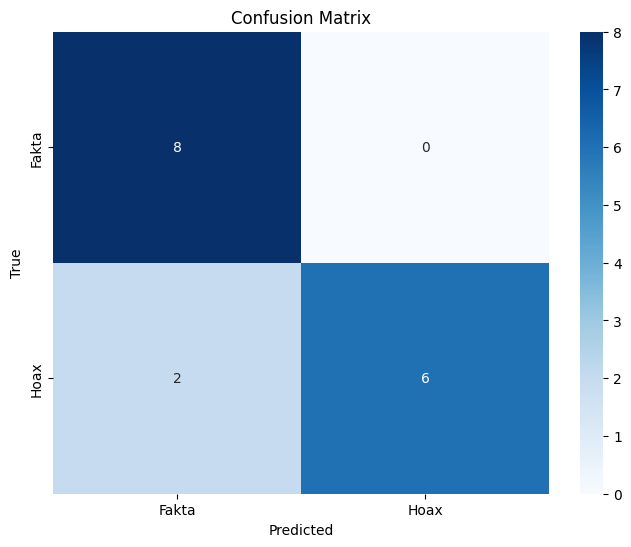

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menampilkan confusion matrix dalam bentuk visual
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Menampilkan visualisasi confusion matrix
plot_confusion_matrix(conf_matrix, labels=['Fakta', 'Hoax'])

In [18]:
# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       Fakta       0.80      1.00      0.89         8
        Hoax       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



In [21]:
# Membuat dataframe dengan judul artikel, true label, dan predicted label
df_result = pd.DataFrame({'judul_artikel': x_test, 'true_label': y_test, 'predicted_label': y_pred})
df_result

,judul_artikel,true_label,predicted_label
0,Ini Nama-nama 12 Panelis Debat Terakhir Pilpre...,Fakta,Fakta
1,PKB soal Masinton Cuit GanjarMahfud2024-AMINAj...,Fakta,Fakta
2,"Edy Pamer Foto Jenderal Dukung AMIN, Gerindra:...",Fakta,Fakta
3,Jokowi Pastikan Pertemuannya dengan Mahfud: Na...,Fakta,Fakta
4,Almas Gugat Gibran Wanprestasi Buntut Putusan ...,Fakta,Fakta
5,Respons Jokowi soal Mahfud Akan Mundur dari Me...,Fakta,Fakta
6,Jokowi: Nanti Sore Mungkin Ketemu Pak Mahfud,Fakta,Fakta
7,"Tiba di Manado, Ganjar Dialog dengan Tokoh Aga...",Fakta,Fakta
8,Gibran bicara tidak jelas,Hoax,Fakta
9,Jokowi pimpin deklarasi Ganjar Pranowo,Hoax,Hoax
